### Module 3

In [1]:
from pathlib import Path

parent_dir = Path().resolve().parent 
data_path = parent_dir/"data/module3"   
result_path = parent_dir/"results/module3" 
result_path.mkdir(exist_ok=True)

Ex3.1

In [2]:
from a2cw import load_nii

scans, masks = load_nii(data_path)
print(f"Data loaded for {len(scans)} patients.")

Data loaded for 40 patients.



For patient 31:
  Segmentation range (without padding): x=(365, 396), y=(295, 321), z=(168, 178)
  Subvolume shape: (91, 86, 20)
  Metrices: Dice=0.2195, Precision=0.1259, Recall=0.8581

For patient 38:
  Segmentation range (without padding): x=(343, 380), y=(219, 255), z=(407, 432)
  Subvolume shape: (97, 96, 35)
  Metrices: Dice=0.1453, Precision=0.0825, Recall=0.6096


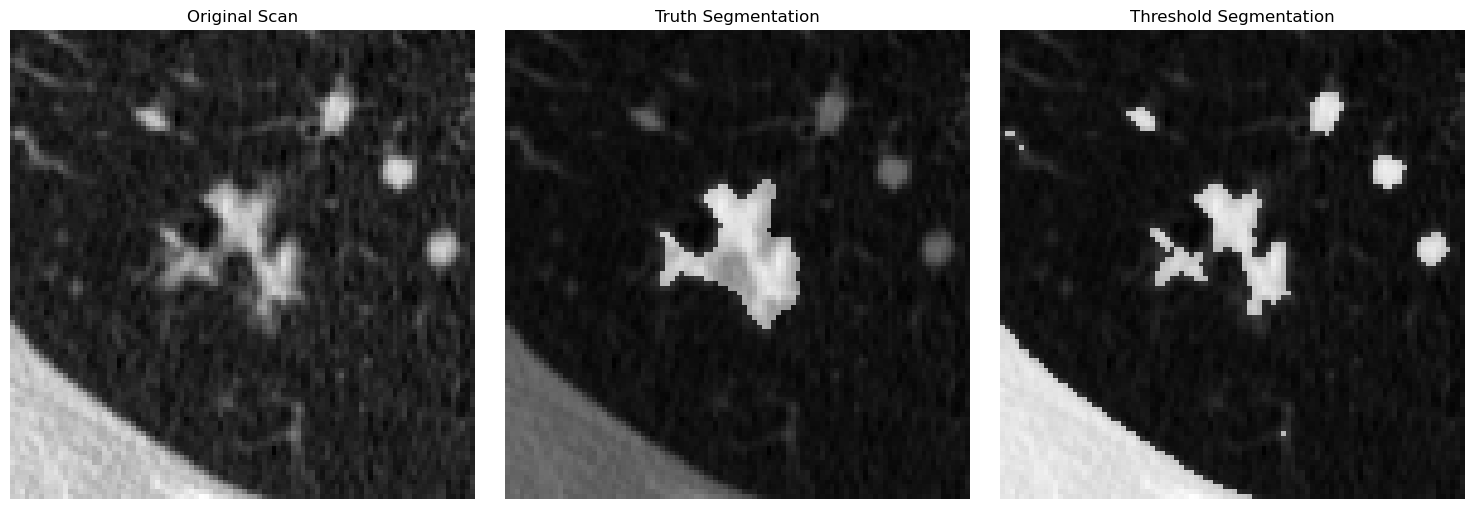


For patient 0:
  Segmentation range (without padding): x=(114, 123), y=(277, 292), z=(99, 101)
  Subvolume shape: (69, 75, 12)
  Metrices: Dice=0.0079, Precision=0.0040, Recall=0.4538

For patient 1:
  Segmentation range (without padding): x=(97, 139), y=(346, 384), z=(98, 108)
  Subvolume shape: (102, 98, 20)
  Metrices: Dice=0.0657, Precision=0.0340, Recall=0.9575

For patient 6:
  Segmentation range (without padding): x=(406, 448), y=(217, 252), z=(35, 44)
  Subvolume shape: (102, 95, 19)
  Metrices: Dice=0.0555, Precision=0.0287, Recall=0.8773

For patient 27:
  Segmentation range (without padding): x=(87, 94), y=(253, 262), z=(58, 60)
  Subvolume shape: (67, 69, 12)
  Metrices: Dice=0.0047, Precision=0.0023, Recall=0.3525

For patient 18:
  Segmentation range (without padding): x=(308, 316), y=(331, 341), z=(96, 97)
  Subvolume shape: (68, 70, 11)
  Metrices: Dice=0.0085, Precision=0.0043, Recall=0.5612

For patient 16:
  Segmentation range (without padding): x=(353, 385), y=(344

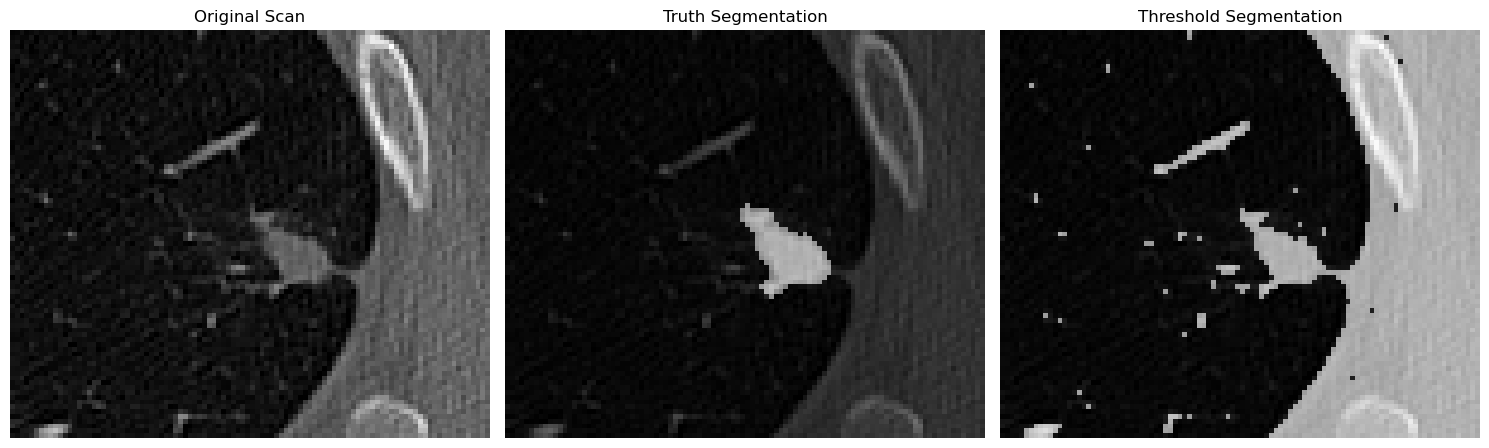


For patient 15:
  Segmentation range (without padding): x=(129, 191), y=(243, 304), z=(85, 94)
  Subvolume shape: (122, 121, 19)
  Metrices: Dice=0.0925, Precision=0.0487, Recall=0.9220

For patient 19:
  Segmentation range (without padding): x=(375, 403), y=(305, 339), z=(107, 115)
  Subvolume shape: (88, 94, 18)
  Metrices: Dice=0.1339, Precision=0.0731, Recall=0.7948

For patient 5:
  Segmentation range (without padding): x=(141, 157), y=(204, 220), z=(76, 79)
  Subvolume shape: (76, 76, 13)
  Metrices: Dice=0.0388, Precision=0.0201, Recall=0.5891

For patient 2:
  Segmentation range (without padding): x=(302, 328), y=(267, 300), z=(172, 200)
  Subvolume shape: (86, 93, 38)
  Metrices: Dice=0.0888, Precision=0.0464, Recall=0.9996

For patient 24:
  Segmentation range (without padding): x=(191, 211), y=(332, 350), z=(67, 71)
  Subvolume shape: (80, 78, 14)
  Metrices: Dice=0.0265, Precision=0.0135, Recall=0.7154

For patient 39:
  Segmentation range (without padding): x=(371, 416), 

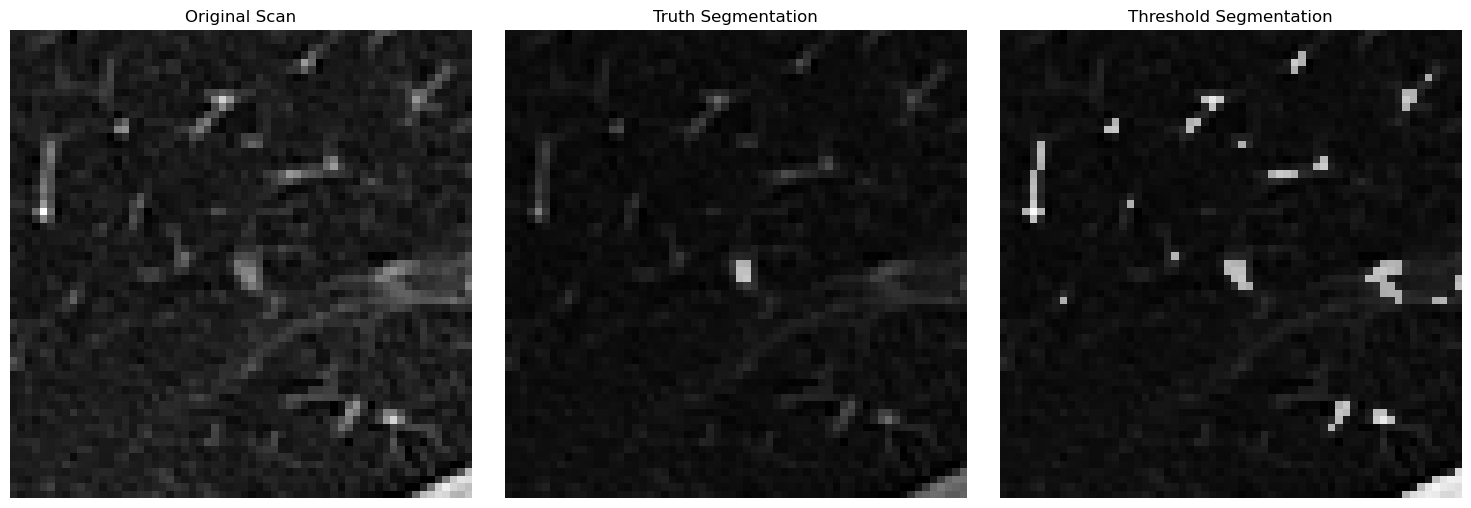


For patient 11:
  Segmentation range (without padding): x=(173, 194), y=(336, 358), z=(61, 66)
  Subvolume shape: (81, 82, 15)
  Metrices: Dice=0.0009, Precision=0.0006, Recall=0.0017

For patient 21:
  Segmentation range (without padding): x=(148, 154), y=(277, 282), z=(83, 83)
  Subvolume shape: (66, 65, 10)
  Metrices: Dice=0.0193, Precision=0.0097, Recall=0.9615

Average Dice Score: 0.0515 ± 0.0517


In [ ]:
import numpy as np
from a2cw import seg_range, subvolume, evaluate, visualise, adapt_thd_segm

results = {}

for id in scans.keys():
    print(f"\nFor patient {id}:")
    
    # find the segmentation range
    s_range = seg_range(masks[id])
    
    print(f"  Segmentation range (without padding): x={s_range['x']}, y={s_range['y']}, z={s_range['z']}")
    
    # create subvolume
    subv = subvolume(scans[id], s_range)
    subv_mask = subvolume(masks[id], s_range)
    
    print(f"  Subvolume shape: {subv.shape}")
    
    scale = 0.31  # adaptive boundary width scale
    boundary = [int(subv.shape[0] * scale), int(subv.shape[1] * scale), int(subv.shape[2] * scale)]
    
    # threshold segmentation comparison
    segmentation = adapt_thd_segm(subv, mask=None, margin_factor=0.01, boundary=boundary)  # OTSU
    #segmentation = adapt_thd_segm(subv, subv_mask, margin_factor=0.01, boundary=boundary) # refined th segmentation

    # evaluate result
    metrics = evaluate(segmentation, subv_mask)
    
    print(f"  Metrices: Dice={metrics['dice']:.4f}, Precision={metrics['precision']:.4f}, Recall={metrics['recall']:.4f}")
    
    results[id] = {
        'subvolume': subv,
        'truth': subv_mask,
        'segmentation': segmentation,
        'metrics': metrics
    }
    
    # visualise a few patients
    if id == '22' or id == '38' or id == '25':
        visualise(subv, subv_mask, segmentation)

# analysis all results
dice_scores = [results[pid]['metrics']['dice'] for pid in results]
mean_dice = np.mean(dice_scores)
std_dice = np.std(dice_scores)

print(f"\nAverage Dice Score: {mean_dice:.4f} ± {std_dice:.4f}")


Ex3.2

In [4]:
from a2cw import load_nii, load_labels

#scans, masks = load_nii(data_path)    # Don't reload if it has been loaded before (will cause MemoryError)
labels = load_labels(data_path)

print(f"Labels loaded for {len(labels)} patients, \nScan data loaded for {len(scans)} patients.")

Labels loaded for 40 patients, 
Scan data loaded for 40 patients.


Intensity range for all patients: [-1024.0, 1733.0]
Using 100 bins to calculate the uniformity.

Extracted 40 patient features, print the first five rows:
          energy         mad  uniformity  label
31  1.945056e+08  184.184791    0.023300      2
38  1.004737e+09  196.414330    0.013202      2
0   2.767373e+07  189.503849    0.018996      2
1   5.751380e+07  106.039925    0.037137      3
6   3.386510e+08  220.788669    0.024592      2


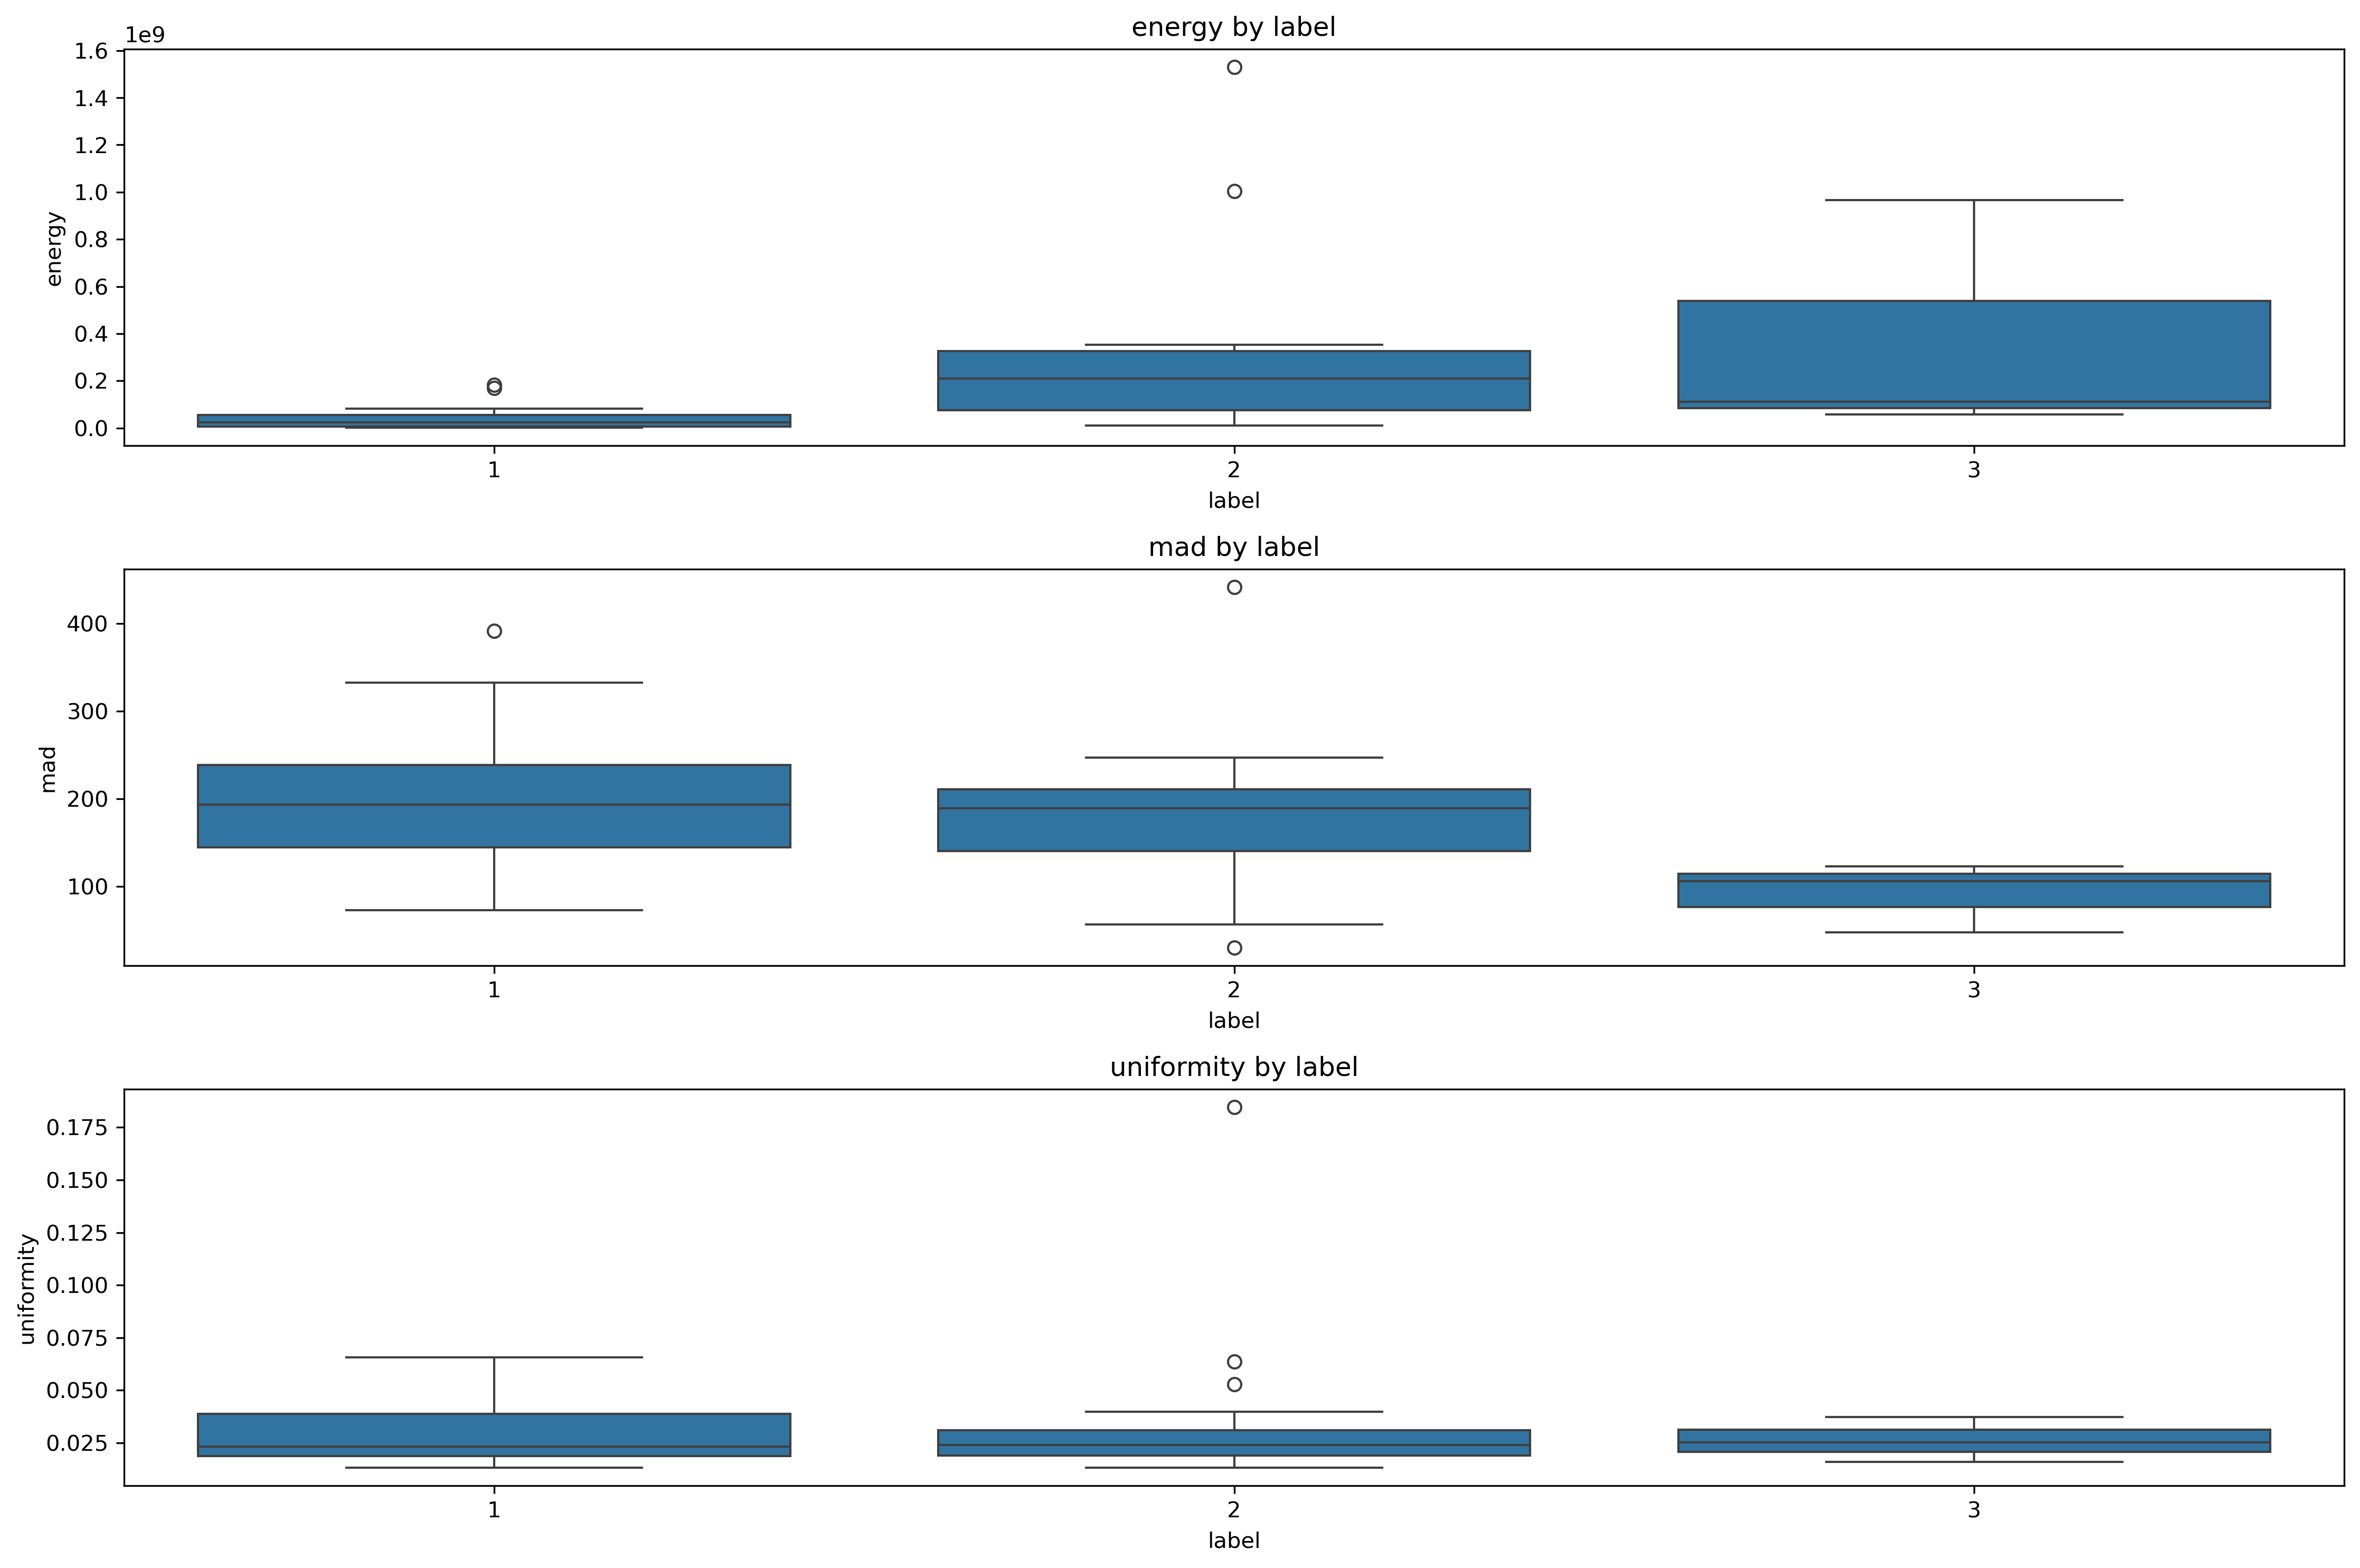

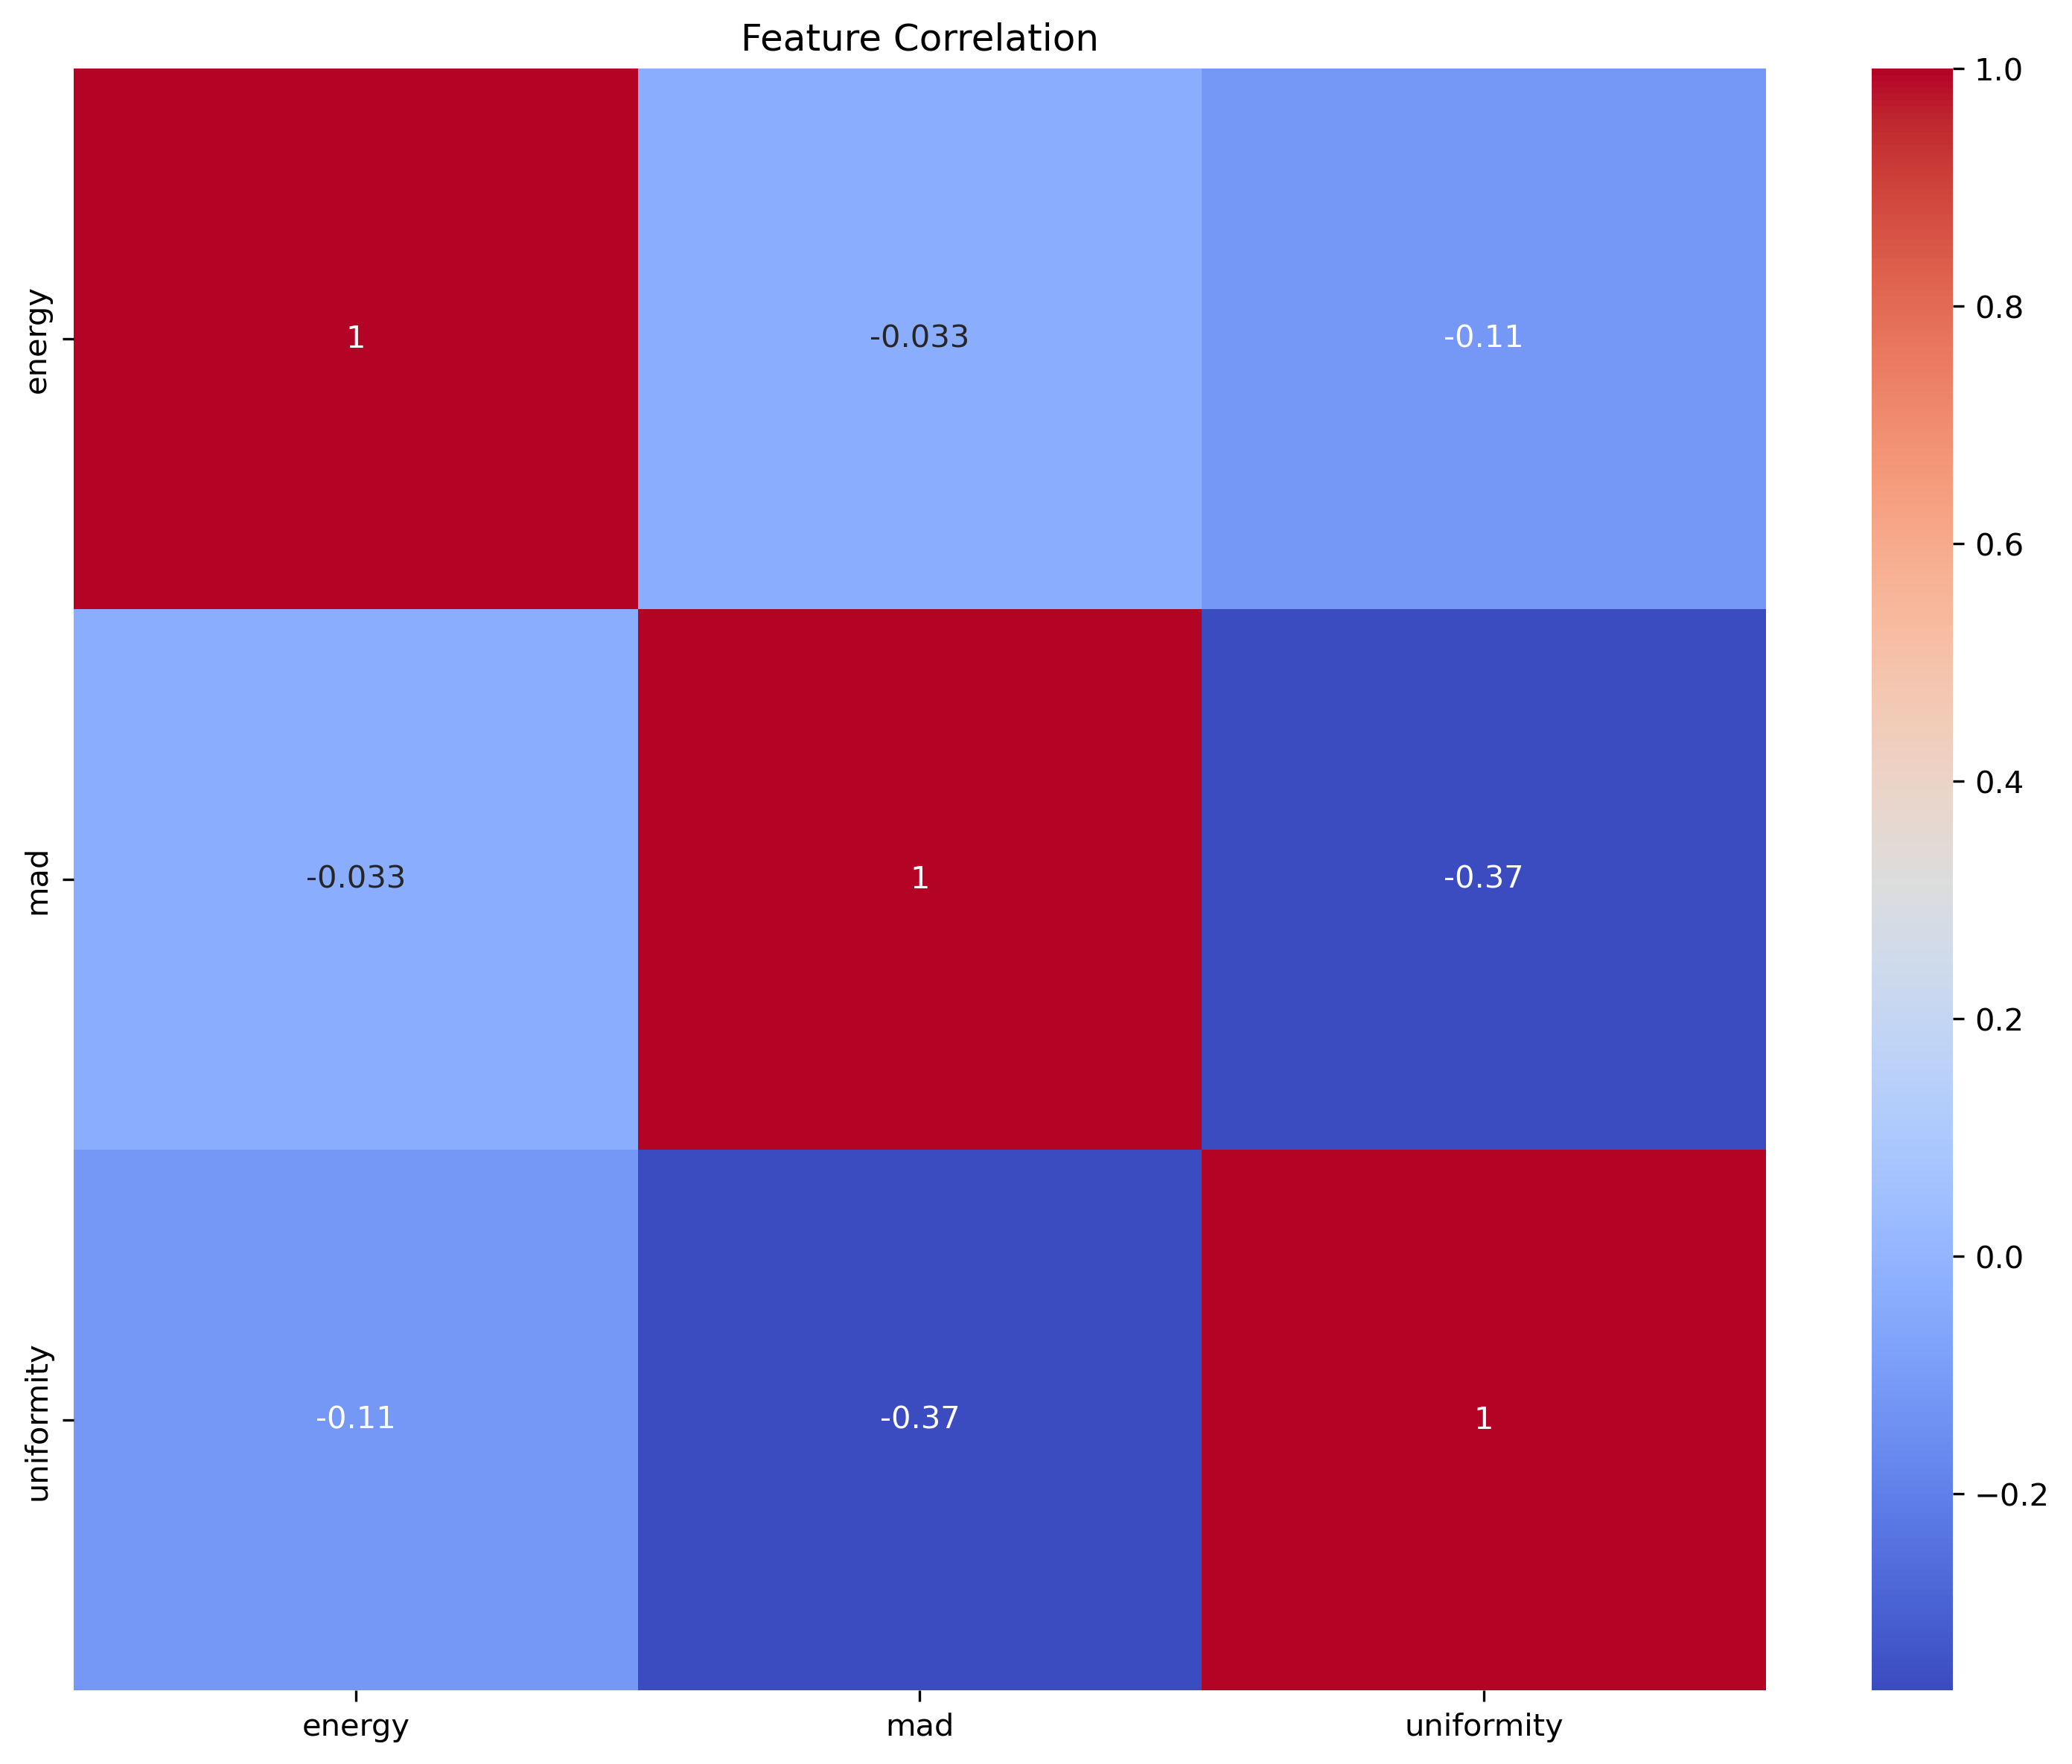

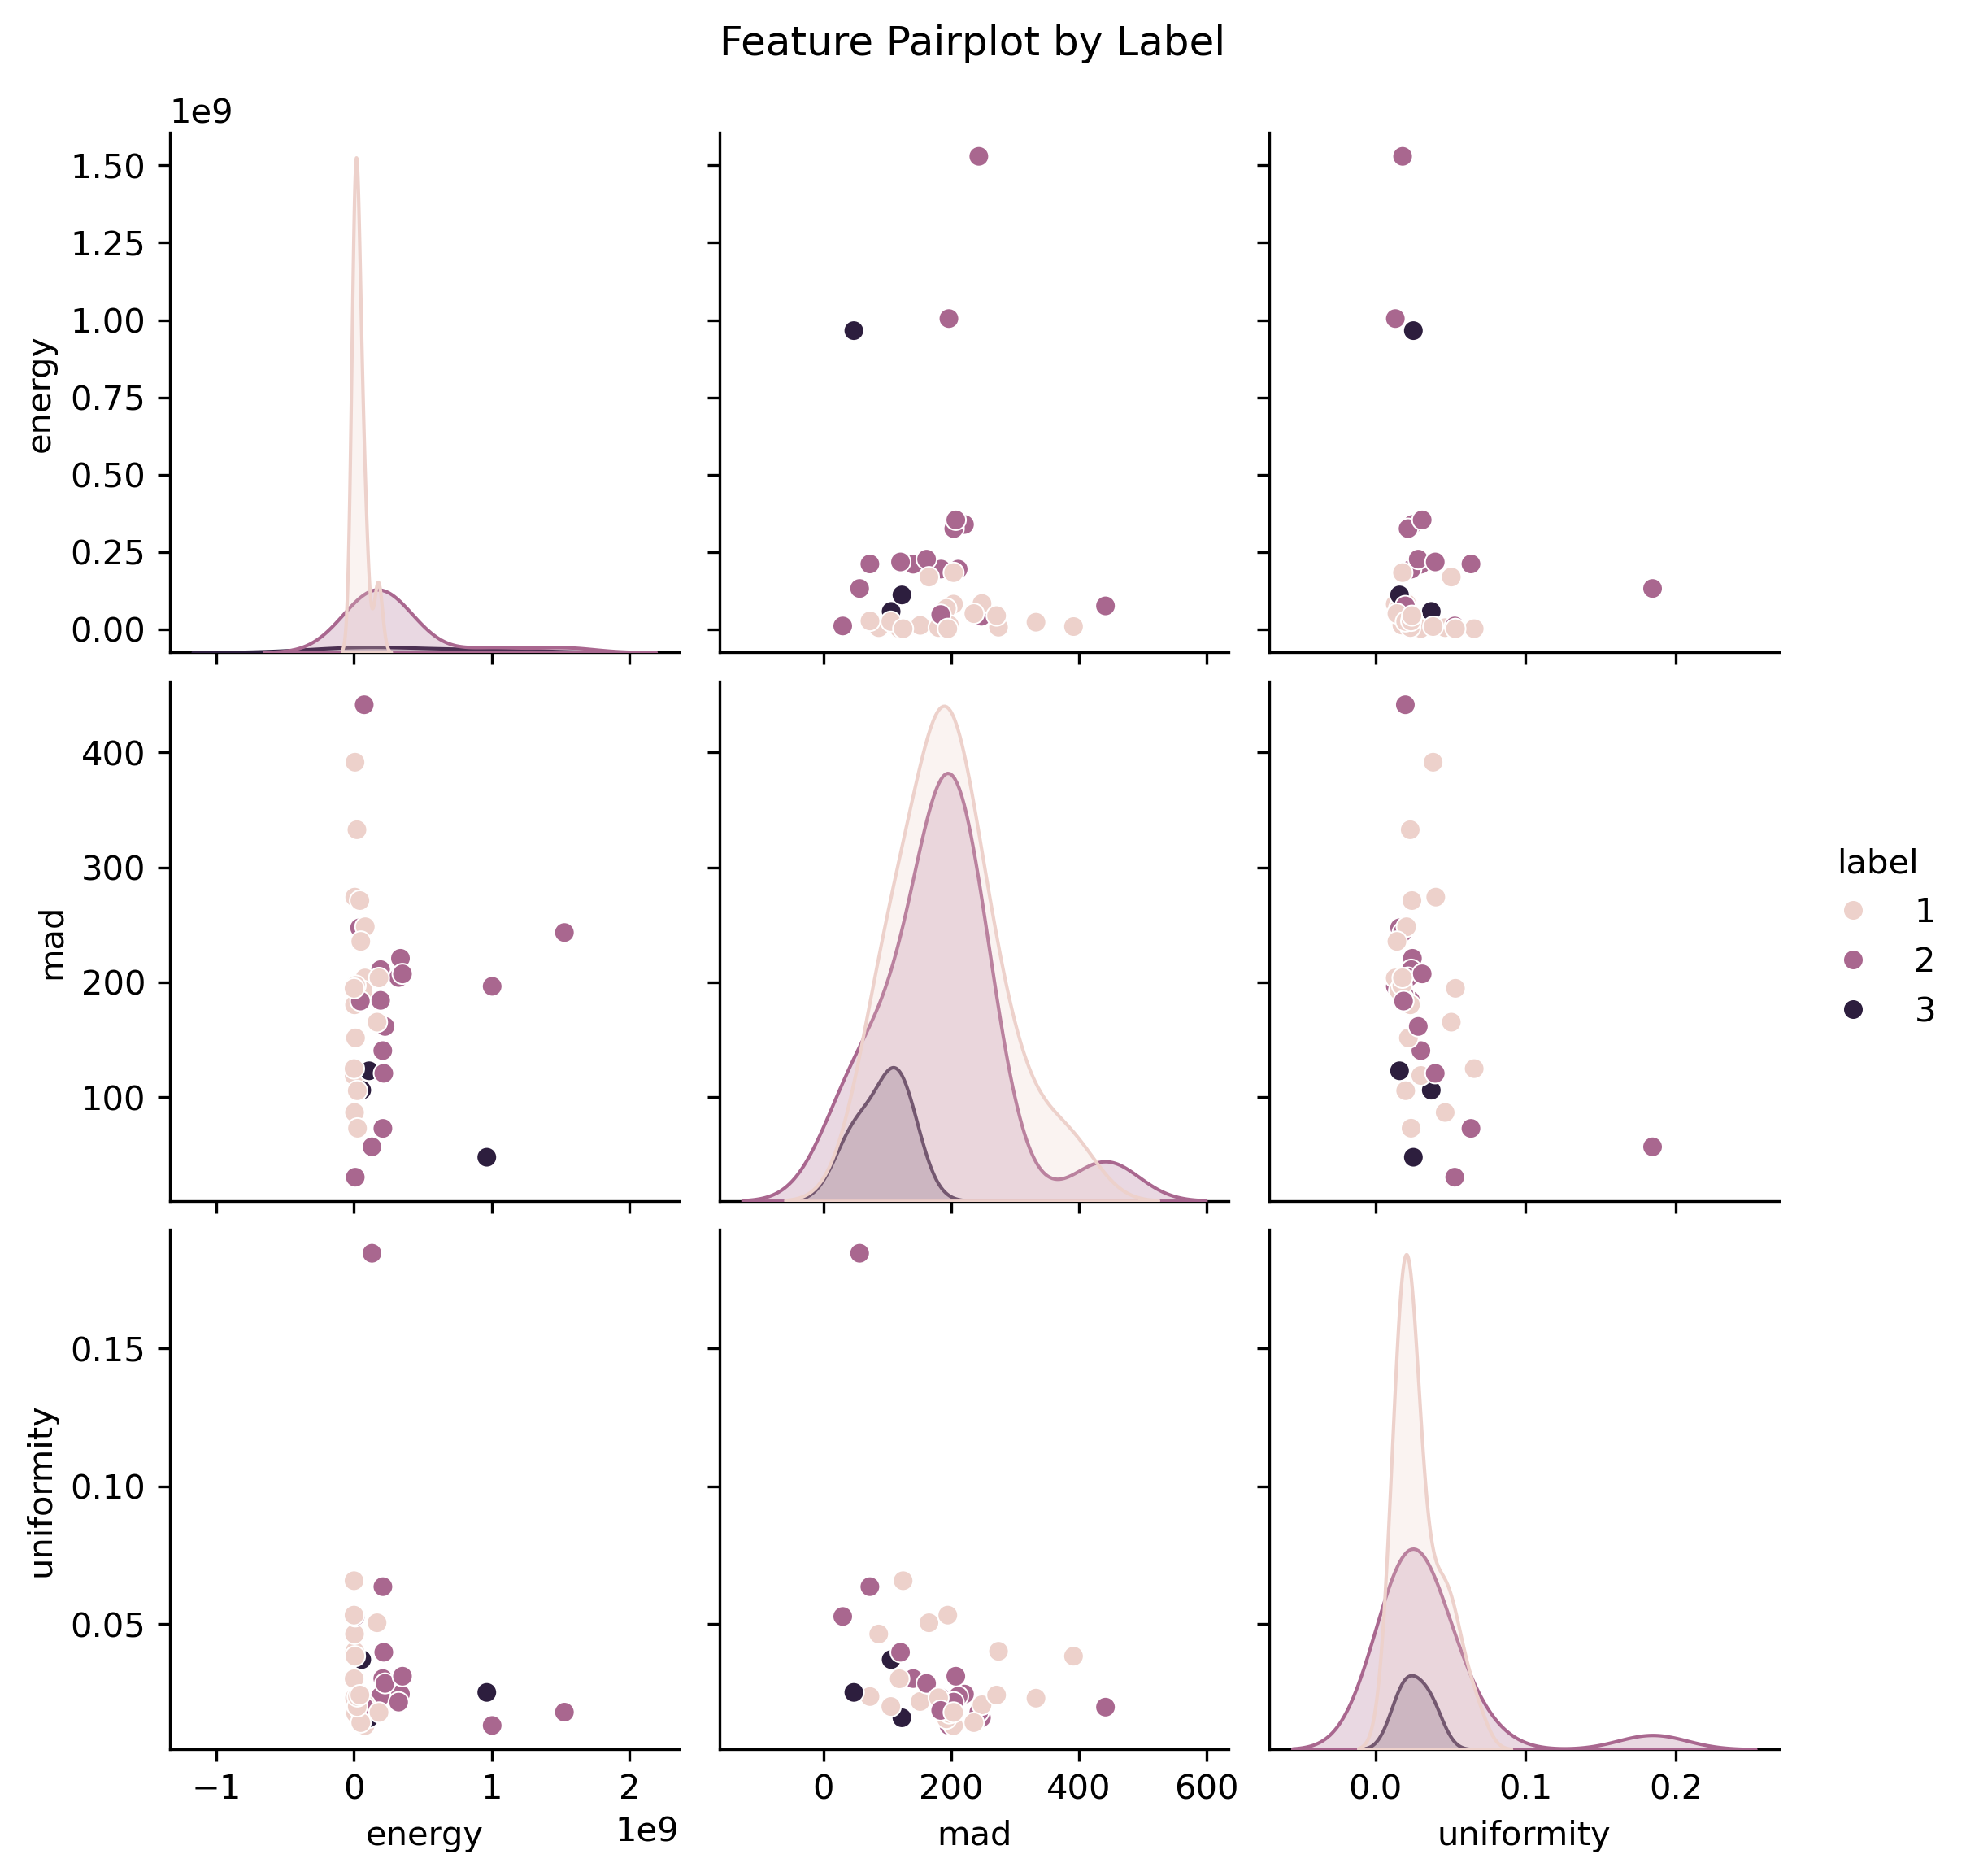

In [7]:
import numpy as np
import pandas as pd

from a2cw import extract_fea, vis_fea

# find the ranges of min-max intensities
mins = []
maxs = []

for id in scans:
    voxels = scans[id][masks[id] > 0]
    if len(voxels) > 0:
        mins.append(np.min(voxels))
        maxs.append(np.max(voxels))

all_min = np.min(mins)
all_max = np.max(maxs)

print(f"Intensity range for all patients: [{all_min}, {all_max}]")


n_bins = 100
print(f"Using {n_bins} bins to calculate the uniformity.")

fea_dict = {}

for id in scans.keys():
    if id in labels.keys():
        features = extract_fea(scans[id], masks[id], n_bins=n_bins)
        
        if features:
            features['label'] = labels[id]
            fea_dict[id] = features
    else:
        print(f"Warning: Patient {id} has no label!")

# convey to DataFrame
fea_df = pd.DataFrame.from_dict(fea_dict, orient='index')

print(f"\nExtracted {len(fea_df)} patient features, print the first five rows:")
print(fea_df.head())

vis_fea(fea_df)


In [ ]:
from a2cw import analyse
import pandas as pd
pd.set_option('display.width', 150)
pd.set_option('display.max_columns', None) 

best_feature = analyse(fea_df).index[0]
print(f"\nBased on statistical significance, {best_feature} \
may be the best feature to classify between the benign and malignant lesions.")

t-test:
            t_statistic   p_value   mean_benign  mean_malignant    std_benign  std_malignant
energy        -3.052541  0.006369  4.174371e+07    3.137498e+08  5.127233e+07   3.850141e+08
mad            1.005067  0.321331  1.967732e+02    1.693786e+02  7.829315e+01   8.936224e+01
uniformity    -0.712795  0.482593  2.894423e-02    3.535466e-02  1.455553e-02   3.639880e-02

Based on statistical significance, energy may be the best feature to classify between the benign and malignant lesions.
